In [49]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten , Input

import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Data path
data_dir = "../Data"
train_dir = "../Data/train"
test_dir = "../Data/test"

# Image size and batch variable
img_height , img_weidth = 48 , 48
batch = 32

# Image Normalization to [0,1]
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split = 0.2
    )

# Note for the labes, the flow_from_directory assigns it according to the folder name
# Load training data
train_data = datagen.flow_from_directory(
    train_dir,
    target_size = (img_height, img_weidth),
    batch_size = batch,
    class_mode = 'categorical',
    color_mode = "grayscale",
    subset = 'training'
)

validation_data = datagen.flow_from_directory(
    train_dir,
    target_size = (img_height, img_weidth),
    batch_size = batch,
    class_mode = 'categorical',
    color_mode = 'grayscale',
    subset='validation'
)

# Load test data
test_data = datagen.flow_from_directory(
    test_dir,
    target_size = (img_height, img_weidth),
    batch_size = batch,
    class_mode = 'categorical',
    color_mode = "grayscale"
)



Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [58]:
# Verify the data and its lable
# Check the output summary
print("Class names:", train_data.class_indices)
print("Number of batches per epoch:", train_data.samples // batch) 
print("Image shape:", train_data.image_shape)  
print("Number of classes:", len(train_data.class_indices))  

Class names: {'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}
Number of batches per epoch: 717
Image shape: (48, 48, 1)
Number of classes: 7


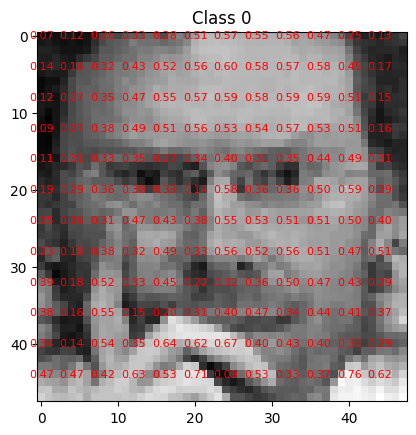

In [59]:
# Visualizing the image in its pixel value with 4 intervals

images , labels = next(train_data)
image = images[0].reshape(img_height, img_weidth)
label = labels[0]
c_value = np.argmax(label)

plt.imshow(image, cmap='gray')
plt.title(f"Class {c_value}")

for i in range(0, img_height, 4):
    for j in range(0, img_weidth, 4):
        plt.text(j,i, f"{image[i,j]:.2f}", color='red', fontsize=8, ha='center', va='center' )
plt.show()

In [60]:
# intregrating convolution layers
model = Sequential()
model.add(Input(shape=(img_height, img_weidth, 1)))
model.add(Conv2D(32, kernel_size= 3, activation='relu' ))
model.add(Conv2D(64, kernel_size= 3, activation='relu'))

# intregrating Dense layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(7, activation='softmax'))
 
# Compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 44, 44, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 123904)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │    15,859,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,879,559 (60.58 MB)

 Trainable params: 15,879,559 (60.58 MB)

 Non-trainable params: 0 (0.00 B)

In [61]:
# Training the model
history = model.fit(train_data, epochs=10, validation_data = validation_data)


Epoch 1/10


/home/minso/miniconda3/envs/aai/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


718/718 ━━━━━━━━━━━━━━━━━━━━ 149s 206ms/step - accuracy: 0.2829 - loss: 2.0057 - val_accuracy: 0.4064 - val_loss: 1.5453
Epoch 2/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 147s 205ms/step - accuracy: 0.4701 - loss: 1.4055 - val_accuracy: 0.4508 - val_loss: 1.4275
Epoch 3/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 144s 201ms/step - accuracy: 0.5704 - loss: 1.1476 - val_accuracy: 0.4673 - val_loss: 1.4176
Epoch 4/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 144s 200ms/step - accuracy: 0.7135 - loss: 0.7951 - val_accuracy: 0.4626 - val_loss: 1.6319
Epoch 5/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 143s 199ms/step - accuracy: 0.8713 - loss: 0.4080 - val_accuracy: 0.4565 - val_loss: 2.1473
Epoch 6/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 137s 190ms/step - accuracy: 0.9577 - loss: 0.1598 - val_accuracy: 0.4551 - val_loss: 2.9615
Epoch 7/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 134s 186ms/step - accuracy: 0.9850 - loss: 0.0773 - val_accuracy: 0.4646 - val_loss: 3.1574
Epoch 8/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 135s 187ms/step - accuracy: 0.9921 - loss: 0.04

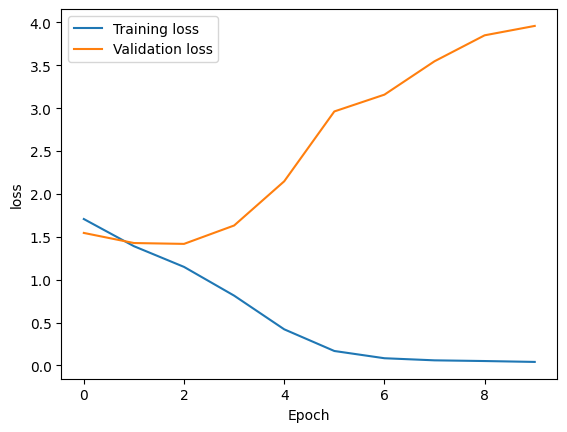

In [66]:
plt.plot(history.history['loss'], label= "Training loss")
plt.plot(history.history['val_loss'], label= "Validation loss")
plt.xlabel("Epoch")
plt.ylabel("loss")
plt.legend()
plt.show()

In [62]:
test_loss, test_accuracy = model.evaluate(test_data)

/home/minso/miniconda3/envs/aai/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


225/225 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - accuracy: 0.4496 - loss: 3.9022


Looking at the result of the model we can see that the model is overfitting as the traning accuracy after 10 epoch is 99.46% how ever the validation accuracy is at 45.01 %.